In [5]:
import dgl
import torch
import csv

In [6]:
data_dict = {
    ('borrower', 'links to', 'borrower'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
    ('borrower', 'belongs to', 'sector'): (torch.tensor([0, 1, 2]), torch.tensor([0, 1, 1]))
}
g = dgl.heterograph(data_dict)
g

Graph(num_nodes={'borrower': 3, 'sector': 2},
      num_edges={('borrower', 'belongs to', 'sector'): 3, ('borrower', 'links to', 'borrower'): 2},
      metagraph=[('borrower', 'sector', 'belongs to'), ('borrower', 'borrower', 'links to')])

In [7]:

file = open("d_mnemonic.txt", "r")


with open('borrower_ID.csv', 'w') as f:
    
    writer = csv.writer(f)
    writer.writerow(['Index','Borrower_ID'])
    l = []
    
    for r in file:
        
        i,_,_ = r.split(",")
        
        if i not in l:
            writer.writerow([len(l),i])
            l.append(i)
        

In [8]:

with open('Sector_List.csv', 'w') as f:

    writer = csv.writer(f)
    writer.writerow(['Index','Sector'])
    
    for i in range(1,5):
        writer.writerow([i,'Sector'+str(i)])

In [9]:

file = open("d_mnemonic.txt", "r")


with open('borrower_ID_Sector.csv', 'w') as f:
    
    writer = csv.writer(f)
    writer.writerow(['Index','Borrower_ID','Sector'])
    l = []
    
    for r in file:
        
        i,_,_ = r.split(",")
        
        if i not in l:
            if len(l) in range(50):
                writer.writerow([len(l),i,'Sector 1'])
            if len(l) in range(50,100):
                writer.writerow([len(l),i,'Sector 2'])
            if len(l) in range(100,150):
                writer.writerow([len(l),i,'Sector 3'])
            if len(l) in range(150,161):
                writer.writerow([len(l),i,'Sector 4'])
            l.append(i)
        


In [10]:
import pandas as pd


borrower = pd.read_csv('borrower_ID.csv')

sector = pd.read_csv('Sector_List.csv')
print(sector)

bs_link = pd.read_csv('borrower_ID_Sector.csv')


   Index   Sector
0      1  Sector1
1      2  Sector2
2      3  Sector3
3      4  Sector4


In [11]:
## Borrower to Borrower  :  src and dst
borrower_src = []
borrower_dst = []

for i in range(158):
    for j in range(1,5):
        borrower_src.append(i)
        borrower_dst.append(i+j)
        
print(borrower_src[:20])
print(borrower_dst[:20])

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]
[1, 2, 3, 4, 2, 3, 4, 5, 3, 4, 5, 6, 4, 5, 6, 7, 5, 6, 7, 8]


In [12]:
borrower_sector_src = []
borrower_sector_dst = []

for i in range(162):
    borrower_sector_src.append(i)
    
    if i in range(50):
        borrower_sector_dst.append(0)
    if i in range(50,100):
        borrower_sector_dst.append(1)
    if i in range(100,150):
        borrower_sector_dst.append(2)
    if i in range(150,162):
        borrower_sector_dst.append(3)
        

In [13]:
data_dict = {
    ('borrower', 'links to', 'borrower'): (torch.tensor(borrower_src), torch.tensor(borrower_dst)),
    ('borrower', 'belongs to', 'sector'): (torch.tensor(borrower_sector_src), torch.tensor(borrower_sector_dst))
}

g = dgl.heterograph(data_dict)
g


Graph(num_nodes={'borrower': 162, 'sector': 4},
      num_edges={('borrower', 'belongs to', 'sector'): 162, ('borrower', 'links to', 'borrower'): 632},
      metagraph=[('borrower', 'sector', 'belongs to'), ('borrower', 'borrower', 'links to')])

In [15]:
node_dict = {'borrower':[0,1]}

sg = g.out_subgraph(node_dict)
sg

Graph(num_nodes={'borrower': 162, 'sector': 4},
      num_edges={('borrower', 'belongs to', 'sector'): 2, ('borrower', 'links to', 'borrower'): 8},
      metagraph=[('borrower', 'sector', 'belongs to'), ('borrower', 'borrower', 'links to')])

In [30]:
h_graph = dgl.to_homogeneous(sg)
h_graph

Graph(num_nodes=166, num_edges=10,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), '_TYPE': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), '_TYPE': Scheme(shape=(), dtype=torch.int64)})

In [31]:
nx_graph = dgl.to_networkx(h_graph)

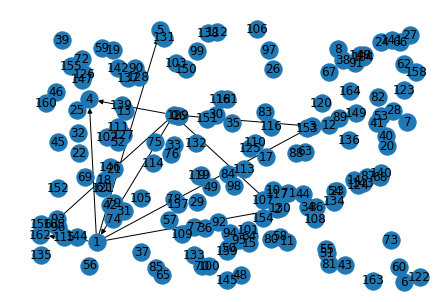

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
  

nx.draw_random(nx_graph, with_labels = True)
  
# clearing the current plot
plt.show()